In [25]:
import os

from sklearn import metrics 

import numpy as np
import tensorflow as tf
from tensorflow.python.summary import summary_iterator

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [26]:
bert_models = [
    'BERT/train_20/bs10_hdo15',
    'BERT/train_200/bs32_hdo15',
    'BERT/train_2000/bs32_hdo15',
    'BERT/train_5000/bs32_hdo15',
    'BERT/train_12000/bs32_hdo15',
]
bert_files = [os.path.join("./model", model, "test_predictions.pkl") for model in bert_models]

In [27]:
xlnet_models = [
    'XLNET/train_20/bs5_hdo10_lr1',
    'XLNET/train_200/bs32_hdo10_lr3',
]
xlnet_files = [os.path.join("./model", model, "test_predictions.pkl") for model in xlnet_models]

In [28]:
bert_dfs = [pd.read_pickle(file) for file in bert_files]
xlnet_dfs = [pd.read_pickle(file) for file in xlnet_files]

In [29]:
class_names = ["Book_{}".format(x) for x in range(1,6)]

In [30]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Summary for Case BERT/train_20/bs10_hdo15
Accuracy on Test Set: 0.230

Error Rate on Test Set: 0.770

Classification Report on Dev Set: 
               precision    recall  f1-score   support

           1       0.21      0.22      0.22       314
           2       0.27      0.11      0.15       397
           3       0.24      0.55      0.33       439
           4       0.16      0.15      0.16       316
           5       0.36      0.09      0.14       472

   micro avg       0.23      0.23      0.23      1938
   macro avg       0.25      0.22      0.20      1938
weighted avg       0.26      0.23      0.20      1938

Confusion matrix, without normalization
[[ 70  25 157  48  14]
 [ 69  42 215  56  15]
 [ 81  37 243  57  21]
 [ 53  20 171  48  24]
 [ 61  31 245  93  42]]


Summary for Case BERT/train_200/bs32_hdo15
Accuracy on Test Set: 0.277

Error Rate on Test Set: 0.723

Classification Report on Dev Set: 
               precision    recall  f1-score   support

           1       0.

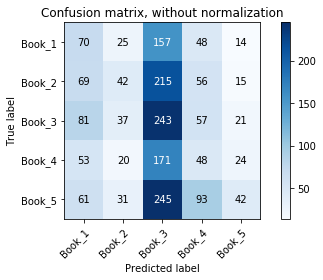

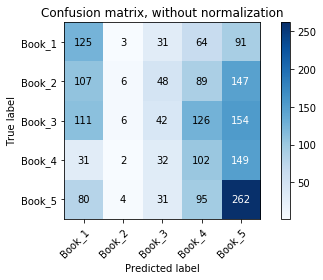

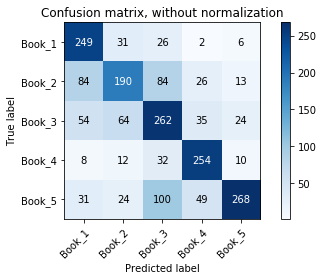

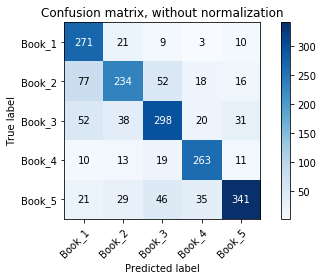

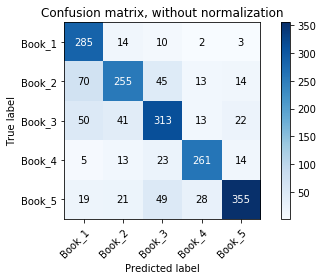

In [31]:
bert_errors = []
for i, df in enumerate(bert_dfs):
    print("Summary for Case {}".format(bert_models[i]))
    print("="*50)
    print("Accuracy on Test Set: {:3.3f}\n".format(metrics.accuracy_score(df.label, df.preds)))
    print("Error Rate on Test Set: {:3.3f}\n".format(1-metrics.accuracy_score(df.label, df.preds)))
    bert_errors.append(1-metrics.accuracy_score(df.label, df.preds))
    print("="*50)
    print("Classification Report on Dev Set: \n", metrics.classification_report(df.label, df.preds))
    plot_confusion_matrix(df.label, df.preds, classes=class_names,
                      title='Confusion matrix, without normalization')
    print("="*50 + "\n\n")
    
    np.set_printoptions(precision=3)


Summary for Case XLNET/train_20/bs5_hdo10_lr1
Accuracy on Test Set: 0.253

Error Rate on Test Set: 0.747

Classification Report on Dev Set: 
               precision    recall  f1-score   support

           1       0.25      0.50      0.34       314
           2       0.24      0.13      0.17       397
           3       0.31      0.18      0.22       439
           4       0.19      0.33      0.24       316
           5       0.34      0.21      0.26       472

   micro avg       0.25      0.25      0.25      1938
   macro avg       0.27      0.27      0.25      1938
weighted avg       0.27      0.25      0.24      1938

Confusion matrix, without normalization
[[158  13  37  79  27]
 [128  53  53 111  52]
 [130  48  77 107  77]
 [ 93  48  32 103  40]
 [117  55  49 152  99]]


Summary for Case XLNET/train_200/bs32_hdo10_lr3
Accuracy on Test Set: 0.333

Error Rate on Test Set: 0.667

Classification Report on Dev Set: 
               precision    recall  f1-score   support

           1

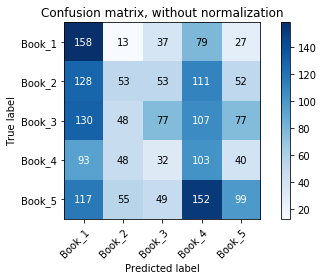

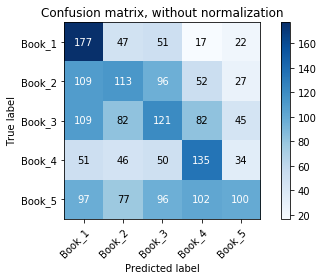

In [32]:
xlnet_errors = []
for i, df in enumerate(xlnet_dfs):
    print("Summary for Case {}".format(xlnet_models[i]))
    print("="*50)
    print("Accuracy on Test Set: {:3.3f}\n".format(metrics.accuracy_score(df.label, df.preds)))
    print("Error Rate on Test Set: {:3.3f}\n".format(1-metrics.accuracy_score(df.label, df.preds)))
    xlnet_errors.append(1-metrics.accuracy_score(df.label, df.preds))
    print("="*50)
    print("Classification Report on Dev Set: \n", metrics.classification_report(df.label, df.preds))
    plot_confusion_matrix(df.label, df.preds, classes=class_names,
                      title='Confusion matrix, without normalization')
    print("="*50 + "\n\n")
    
    np.set_printoptions(precision=3)

# Observations
There appears to be a significant overprediction on Book_1. I wonder if this has to do with the fact that the training data was balanced, but the development set does not appear to be. Let's take a look at the distribution of the actual labels in our training set.

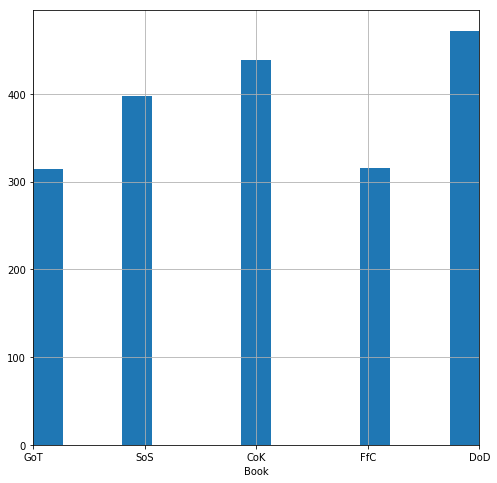

In [33]:
fig, ax = plt.subplots(figsize=(8,8))
bert_dfs[0].label.hist(bins=15, grid=True, ax=ax)
ax.set_xlabel("Book")
ax.set_xlim(1,5)
plt.xticks(range(1,6), ('GoT', 'SoS', 'CoK', 'FfC', 'DoD'))
print()

In [34]:
error_df = pd.read_pickle('./errors.pkl')

In [35]:
error_df['bert_ft_errors'] = bert_errors

,bl_errors,datasets,bert_ft_errors
0,0.747162,20,0.770382
1,0.622291,200,0.722910
2,0.422085,2000,0.368937
3,0.381837,5000,0.273994
4,0.321981,12000,0.242002


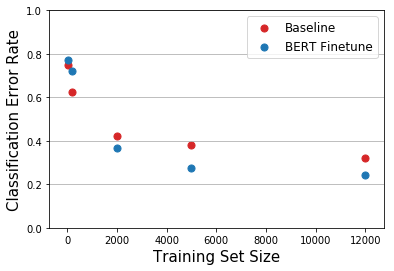

In [36]:
fig, ax = plt.subplots()
plt.scatter(error_df.datasets, error_df.bl_errors, c='tab:red',s=50, label='Baseline')
plt.scatter(error_df.datasets, error_df.bert_ft_errors, c='tab:blue',s=50, label='BERT Finetune')
ax.set(ylim=(0,1.0))
plt.legend(fontsize=12)
plt.xlabel('Training Set Size', fontsize=15)
plt.ylabel('Classification Error Rate', fontsize=15)
plt.grid(True,axis='y')
plt.savefig('report/working/baseline.png')